In [1]:
from pylab import *
from pandas import *
import numpy
from random import shuffle

(17, 17)


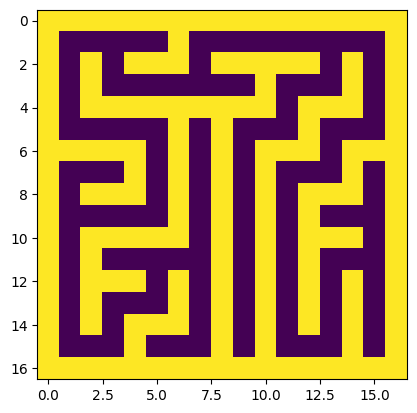

In [2]:
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)

print(maze.shape)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


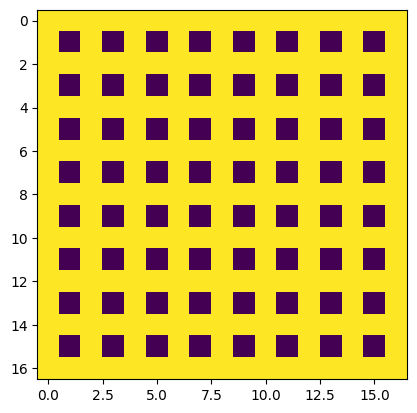

In [3]:
m=numpy.ones((17,17))
for i in range(8):
    for j in range(8):
        m[1+(i*2)][1+(j*2)]=0
imshow(m)
print(m)

In [4]:
#maze
startLocation=[1,1]
targetLocation=[15,15]


In [5]:
maze[1][1]

0

In [6]:
maze[15][15]

0

In [7]:
def giveMeNeighborLocations(x,y):
    return [[x-1,y],[x,y-1],[x+1,y],[x,y+1]]

giveMeNeighborLocations(5,5)

[[4, 5], [5, 4], [6, 5], [5, 6]]

In [8]:
def getNeighbors(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for i in range(4):
        nb.append([x+xm[i],y+ym[i]])
    return nb

getNeighbors(1,1)

[[1, 2], [2, 1], [1, 0], [0, 1]]

In [9]:
#maze[13][15]=1
#imshow(maze)

In [10]:
# maze
startLocation=[1,1]
targetLocation=[15,15]
distances=numpy.zeros(maze.shape)-1

front=[startLocation]
distances[startLocation[0]][startLocation[1]]=0
currentDistance=1
while len(front)>0: 
    newFront=list()
    for currentLocation in front:    
        neighbors=getNeighbors(currentLocation[0],currentLocation[1])
        #print(neighbors)
        for nb in neighbors:
            if maze[nb[0]][nb[1]]==0 and distances[nb[0]][nb[1]]<0.0:
                distances[nb[0]][nb[1]]=currentDistance
                newFront.append(nb)
        #print("current front",newFront)
    front=newFront
    currentDistance+=1 #currentDistance=currentDistance+1

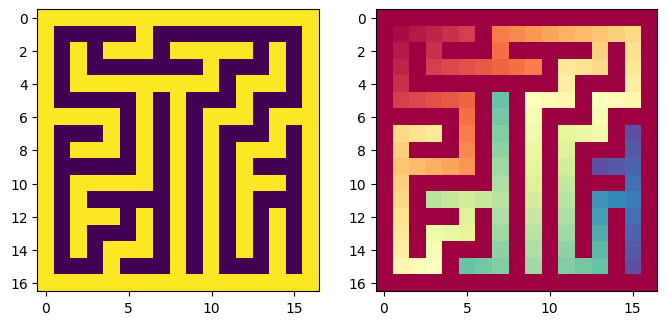

In [11]:
figure(figsize=[8,4])
subplot(1,2,1)
imshow(maze)
subplot(1,2,2)
imshow(distances,cmap='Spectral')


In [12]:
m=[['x',2],['x',4],['x',6]]
print(m)
#print(transpose(m))

[['x', 2], ['x', 4], ['x', 6]]


[1, 1] [15, 15]
success!
[[1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [6, 5], [7, 5], [8, 5], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [8, 1], [7, 1], [7, 2], [7, 3], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [15, 2], [15, 3], [14, 3], [13, 3], [13, 4], [13, 5], [12, 5], [11, 5], [11, 4], [11, 3], [11, 6], [11, 7], [10, 7], [9, 7], [8, 7], [7, 7], [6, 7], [5, 7], [12, 7], [13, 7], [14, 7], [15, 7], [15, 6], [15, 5], [1, 2], [1, 3], [2, 3], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [2, 7], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [2, 13], [3, 13], [3, 12], [3, 11], [4, 11], [5, 11], [5, 10], [5, 9], [6, 9], [7, 9], [8, 9], [9, 9], [10, 9], [11, 9], [12, 9], [13, 9], [14, 9], [15, 9], [1, 14], [1, 15], [2, 15], [3, 15], [4, 15], [5, 15], [5, 14], [5, 13], [6, 13], [7, 13], [7, 12], [7, 11], [8, 11], [9, 11], [10, 11], [11, 11], [12, 11], [13, 11], [14, 11], [15, 11], [15, 12], [15, 13], [14, 13], [13, 13], [12, 13], [11, 13], [11, 1

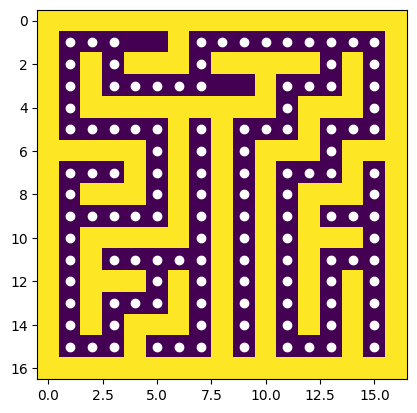

In [13]:
def DFS(maze,startNode,endNode):
    frontier=list()
    frontier.append(startNode)
    explored=list()
    while len(frontier)!=0:
        currentNode=frontier.pop()
        if currentNode in explored:
            continue
        if currentNode == endNode:
            return "success!",explored+[targetLocation]
        for nb in getNeighbors(currentNode[0],currentNode[1]):
            if maze[nb[0]][nb[1]]==0:
                frontier.append(nb)
        explored.append(currentNode)
    return "failure",explored

imshow(maze)
print(startLocation,targetLocation)
answer,explored=DFS(maze,startLocation,targetLocation)
print(answer)
print(explored)
plot(transpose(explored)[1],transpose(explored)[0],'ow')

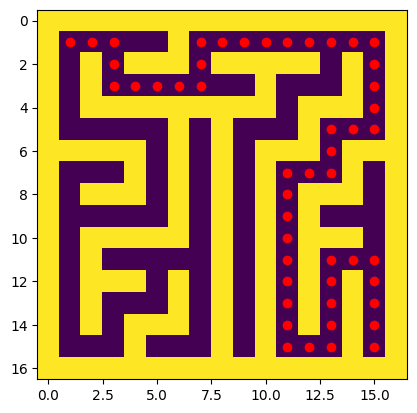

In [14]:
# Get the shortest path 
currentLocation=targetLocation
path=[]
while currentLocation!=startLocation:
    path.append(currentLocation)
    neighbors=getNeighbors(currentLocation[0],currentLocation[1])
    indices=[]
    for nb in neighbors:
        if nb in explored:
            indices.append(explored.index(nb))
    currentLocation=explored[min(indices)] 
    
path.append(startLocation)
imshow(maze)
plot(transpose(path)[1],transpose(path)[0],'or')

In [15]:
len(explored)

123

[1, 1] [15, 15]
success!
[[1, 1], [1, 2], [2, 1], [1, 3], [3, 1], [1, 4], [2, 3], [4, 1], [1, 5], [3, 3], [5, 1], [3, 4], [5, 2], [3, 5], [5, 3], [3, 6], [5, 4], [3, 7], [5, 5], [3, 8], [2, 7], [6, 5], [3, 9], [1, 7], [7, 5], [1, 8], [8, 5], [1, 9], [9, 5], [1, 10], [9, 4], [1, 11], [9, 3], [1, 12], [9, 2], [1, 13], [9, 1], [1, 14], [2, 13], [10, 1], [8, 1], [1, 15], [3, 13], [11, 1], [7, 1], [2, 15], [3, 12], [12, 1], [7, 2], [3, 15], [3, 11], [13, 1], [7, 3], [4, 15], [4, 11], [14, 1], [5, 15], [5, 11], [15, 1], [5, 14], [5, 10], [15, 2], [5, 13], [5, 9], [15, 3], [6, 13], [6, 9], [14, 3], [7, 13], [7, 9], [13, 3], [7, 12], [8, 9], [13, 4], [7, 11], [9, 9], [13, 5], [8, 11], [10, 9], [12, 5], [9, 11], [11, 9], [11, 5], [10, 11], [12, 9], [11, 6], [11, 4], [11, 11], [13, 9], [11, 7], [11, 3], [12, 11], [14, 9], [12, 7], [10, 7], [13, 11], [15, 9], [13, 7], [9, 7], [14, 11], [14, 7], [8, 7], [15, 11], [15, 7], [7, 7], [15, 12], [15, 6], [6, 7], [15, 13], [15, 5], [5, 7], [14, 13], [13,

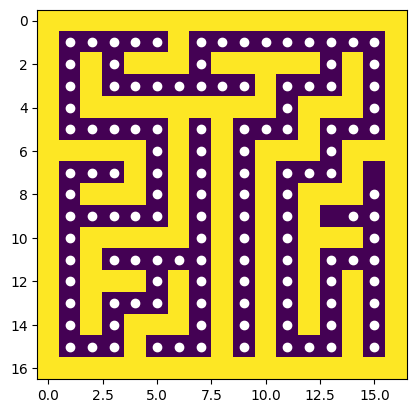

In [16]:
# BFS
from typing import Deque

def BFS(maze,startNode,endNode):
    frontier=Deque()
    frontier.append(startNode)
    explored=list()
    while len(frontier)!=0:
        currentNode=frontier.popleft()
        if currentNode in explored:
            continue
        if currentNode == endNode:
            return "success!",explored+[targetLocation]
        for nb in getNeighbors(currentNode[0],currentNode[1]):
            if maze[nb[0]][nb[1]]==0:
                frontier.append(nb)
        explored.append(currentNode)
    return "failure",explored
 
imshow(maze)
print(startLocation,targetLocation)
answer,explored=BFS(maze,startLocation,targetLocation)
print(answer)
print(explored)
plot(transpose(explored)[1],transpose(explored)[0],'ow')

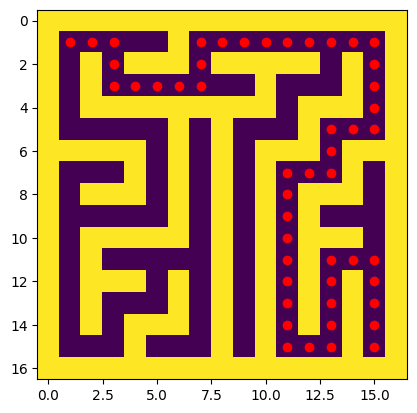

In [17]:
# Get the shortest path 
currentLocation=targetLocation
path=[]
while currentLocation!=startLocation:
    path.append(currentLocation)
    neighbors=getNeighbors(currentLocation[0],currentLocation[1])
    indices=[]
    for nb in neighbors:
        if nb in explored:
            indices.append(explored.index(nb))
    currentLocation=explored[min(indices)]  
path.append(startLocation)
imshow(maze)
plot(transpose(path)[1],transpose(path)[0],'or')

In [18]:
len(explored)

125